## Binary Classification With NN - IMDB

### Data Exploration

In [10]:
from keras.datasets import imdb

# num_words = how many of the top occuring words to keep in the word_index/dictionary
# maxlen = how many words from each review to consider. only words that belong to the  above word index will be considered

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(path="imdb.npz",
                                                      num_words=10000,
                                                      skip_top=0,
                                                      maxlen=None,
                                                      seed=113,
                                                      start_char=1,
                                                      oov_char=2,
                                                      index_from=3)

#### Structure Exploration

In [11]:
print(f"dim/rank/ no of axes of train_data >> {train_data.ndim}")
print(f"shape of train_data>> {train_data.shape}")

print('\n')
print(f"Type of train_data first element >> {type(train_data[0])}")
print(f"Size of train_data first element >> {(len(train_data[0]))}")
print(f"First Element train_data>> {train_data[0][0:218]}")
print('\n')
print(f"dim/rank/ no of axes of train_labels >> {train_labels.ndim}")
print(f"shape of train_labels>> {train_labels.shape}")

print('\n')

print(f"Type of train_labels >> {type(train_labels)}")
print(f"Type of train_labels first element >> {type(train_labels[0])}")
print(f"Size of train_labels>> {(len(train_labels))}")
print(f"Head of train_labels>> {(train_labels)[0:5]}")

#print(f"First Element train_data>> {train_data[0][0:218]}")

dim/rank/ no of axes of train_data >> 1
shape of train_data>> (25000,)


Type of train_data first element >> <class 'list'>
Size of train_data first element >> 218
First Element train_data>> [1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 

#### Content Exploration

In [12]:
word_index:dict = imdb.get_word_index()
print('\n')
print(f"Type of word index >> {type(word_index)}")
print('Observing samples of word index key value pair >> ')
print(list(word_index.keys())[0:5])
print(list(word_index.values())[0:5])

print('\n')
reverse_word_index :dict = {}
for (k,v) in word_index.items():
    reverse_word_index[v] = k

for element in train_data[0]:
    print(reverse_word_index[element],end=" ")



Type of word index >> <class 'dict'>
Observing samples of word index key value pair >> 
['fawn', 'tsukino', 'nunnery', 'sonja', 'vani']
[34701, 52006, 52007, 16816, 63951]


the as you with out themselves powerful lets loves their becomes reaching had journalist of lot from anyone to have after out atmosphere never more room and it so heart shows to years of every never going and help moments or of every chest visual movie except her was several of enough more with is now current film as you of mine potentially unfortunately of you than him that with out themselves her get for was camp of you movie sometimes movie that with scary but and to story wonderful that in seeing in character to of 70s musicians with heart had shadows they of here that with her serious to have does when from why what have critics they is you that isn't one will very to as itself with other and in of seen over landed for anyone of and br show's to whether from than out themselves history he name half some br o

### Data Preprocessing

#### One-Hot Encoding

In [13]:
import numpy as np
def one_hot_encode(data,no_of_words=10000):
    encoded_data = np.zeros([data.size, no_of_words], dtype=int)
    for i in range(25000):
        review_comment:list = data[i]
        for j in range(len(review_comment)):
            encoded_data[i,review_comment[j]]= 1
    return encoded_data

prep_train_data= one_hot_encode(data=train_data,no_of_words=10000)
prep_test_data= one_hot_encode(data=test_data,no_of_words=10000)

print()
print(f"First Review Before Encode >> {train_data[0]}")
print(f"Slice of First Review After Encode >> {prep_train_data[0,0:70]}")

prep_train_labels = np.asarray(train_labels).astype('float32')
prep_test_labels = np.asarray(test_labels).astype('float32')




First Review Before Encode >> [1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
Slice of First Review After E

#### Creating Validation Dataset

In [14]:
x_val_train_data = prep_train_data[0:10000]
x_train_data = prep_train_data[10000:]

y_val_train_labels = prep_train_labels[0:10000]
y_train_labels = prep_train_labels[10000:]

x_test_data = prep_test_data
y_test_labels = prep_test_labels

### Training

#### Model Building

In [15]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))


model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(x=x_train_data,
                    y=y_train_labels,
                    batch_size=512,
                    epochs=20,
                    verbose = 0,
                    validation_data=(x_val_train_data,y_val_train_labels))

#### Model Visualisation

Type of history object >> <class 'keras.callbacks.History'>
History Keys >> dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
[0.7865999998410543, 0.9051333333651225, 0.9287999999364217, 0.9436666665395101, 0.954133333047231, 0.9651333333969117, 0.9708000001589457, 0.9763333331108093, 0.9819333333015442, 0.9849999999682109, 0.9902666669209799, 0.9919333331425985, 0.9929333333333333, 0.9940666666666667, 0.9965333333333334, 0.9974, 0.9982, 0.9981333333333333, 0.9992666664759318, 0.9997333333333334]


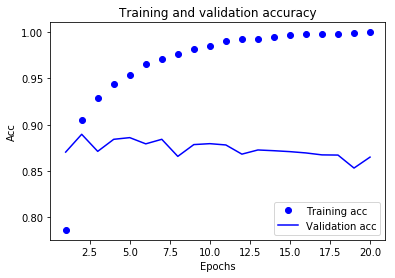

In [16]:
import matplotlib.pyplot as plt

print(f"Type of history object >> {type(history)}")
print(f"History Keys >> {history.history.keys()}")
print((history.history['acc']))

acc_values = history.history['acc']
val_acc_values = history.history['val_acc']
epochs = range(1, len(acc_values) + 1)

plt.clf()
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()
plt.show()


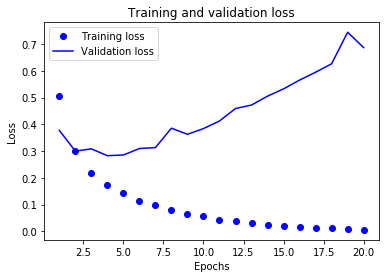

In [17]:
loss_values = history.history['loss']
val_loss_values = history.history['val_loss']
epochs = range(1, len(loss_values) + 1)

plt.clf()
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


### Testing

#### Prediction

In [18]:
results = model.predict(x_test_data)
print(f"Type of results object >> {type(results)}")
print(f"NDim of results object >> {results.ndim}")
print(f"Shape of results object >> {results.shape}")
print(results)

Type of results object >> <class 'numpy.ndarray'>
NDim of results object >> 2
Shape of results object >> (25000, 1)
[[0.00744385]
 [0.99999976]
 [0.9063444 ]
 ...
 [0.0016883 ]
 [0.00705766]
 [0.76169556]]


#### Evaluation

In [19]:
score = model.evaluate(x_test_data, y_test_labels, batch_size=512)
print(f"Type of score object >> {type(score)}")
print(score)
print(model.metrics_names)
print(f"The accuracy of the model >> {score[1]}")

25000/25000 [==============================] - 1s 51us/step
Type of score object >> <class 'list'>
[0.7662144334220886, 0.8486399999046326]
['loss', 'acc']
The accuracy of the model >> 0.8486399999046326
